In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.impute import KNNImputer

# Cosine similarity

### 1) Write a function that calculates the cosine similarity between two vectors

$\frac {X \bullet Y}{||X||* ||Y||}$

In [8]:
def cosim(v1, v2):
    numerator = np.dot(v1, v2)
    length_v1 = np.sqrt(np.dot(v1,v1))
    length_v2 = np.sqrt(np.dot(v2,v2))
    cosim = numerator/(length_v1*length_v2)
    return cosim

In [12]:
v1 = [0,4,10]
v2 = [3,3,3]

In [13]:
cosim(v1 ,v2)

0.7504787743864564

In [14]:
cosine_similarity([v1 ,v2])

array([[1.        , 0.75047877],
       [0.75047877, 1.        ]])

### 2) Create a user-item matrix

In [15]:
# movie, ratings by users
data = [
    [2, 4, 2, 5, 2],
    [3, 5, 0, 5, 3],
    [2, 0, 4, 3, 5],
    [2, 3, 4, 3, 4],
    [5, 0, 3, 4, 3]
]
movies = ['Titanic', 'Tiffany', 'StarTrek', 'Terminator', 'StarWars']
users = ['Julius', 'Dina', 'Flann', 'Alex', 'Xaver']
R = pd.DataFrame(data, users, movies)
R

,Titanic,Tiffany,StarTrek,Terminator,StarWars
Julius,2,4,2,5,2
Dina,3,5,0,5,3
Flann,2,0,4,3,5
Alex,2,3,4,3,4
Xaver,5,0,3,4,3


### 3) Create a matrix containing the cosine similarites

In [16]:
csm = cosine_similarity(R)

In [17]:
csm

array([[1.        , 0.94947266, 0.69161899, 0.87854304, 0.75107853],
       [0.94947266, 1.        , 0.59408853, 0.79211803, 0.69465988],
       [0.69161899, 0.59408853, 1.        , 0.90740741, 0.86810687],
       [0.87854304, 0.79211803, 0.90740741, 1.        , 0.81495747],
       [0.75107853, 0.69465988, 0.86810687, 0.81495747, 1.        ]])

In [21]:
csm = pd.DataFrame(csm, columns = users, index = users)
csm

,Julius,Dina,Flann,Alex,Xaver
Julius,1.000000,0.949473,0.691619,0.878543,0.751079
Dina,0.949473,1.000000,0.594089,0.792118,0.694660
Flann,0.691619,0.594089,1.000000,0.907407,0.868107
Alex,0.878543,0.792118,0.907407,1.000000,0.814957
Xaver,0.751079,0.694660,0.868107,0.814957,1.000000


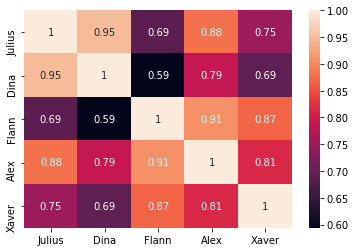

In [25]:
sns.heatmap(csm, annot = True)

### 4) Plot the Cosine Similarities in a heatmap

### 5) Add a new user

In [35]:
stefan = pd.DataFrame([[4,1,5]], columns = ['Titanic', 'Tiffany', 'StarTrek'], index = ['Stefan'])

In [36]:
stefan

,Titanic,Tiffany,StarTrek
Stefan,4,1,5


In [37]:
R.append(stefan)

,StarTrek,StarWars,Terminator,Tiffany,Titanic
Julius,2,2.0,5.0,4,2
Dina,0,3.0,5.0,5,3
Flann,4,5.0,3.0,0,2
Alex,4,4.0,3.0,3,2
Xaver,3,3.0,4.0,0,5
Stefan,5,NaN,NaN,1,4


In [38]:
# one way to do this is with knn imputer
imputer = KNNImputer(n_neighbors=2)
r_knn = 

AttributeError: 'DataFrame' object has no attribute 'fit_transform'

In [46]:
R[['StarTrek', 'Tiffany', 'Titanic']]

,StarTrek,Tiffany,Titanic
Julius,2,4,2
Dina,0,5,3
Flann,4,0,2
Alex,4,3,2
Xaver,3,0,5


### 6) User-based collaborative-filtering

In [50]:
cs_base = pd.DataFrame((cosine_similarity(R[['StarTrek', 'Tiffany', 'Titanic']])), index=R.index, columns=R.index)

In [51]:
cs_base

,Julius,Dina,Flann,Alex,Xaver
Julius,1.000000,0.910182,0.547723,0.909718,0.560112
Dina,0.910182,1.000000,0.230089,0.668776,0.441176
Flann,0.547723,0.230089,1.000000,0.830455,0.843661
Alex,0.909718,0.668776,0.830455,1.000000,0.700623
Xaver,0.560112,0.441176,0.843661,0.700623,1.000000


In [52]:
bob= 'threee,3,five,5'

In [57]:
bob_split = bob.split(',')

In [58]:
bob_list = list(bob_split)

In [59]:
bob_list

['threee', '3', 'five', '5']

### 7) Item-based collaborative-filtering